In [54]:
import numpy as np
import cupy as cp
import poppy
xp = cp if poppy.accel_math._USE_CUPY else np

from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

import misc_funs as misc

from scoobpsf import scoobm, agpm
reload(scoobm)

poppy_log.disabled = True

pupil_diam = 6.8*u.mm
wavelength_c = 632.8e-9*u.m

dm_flat = fits.getdata(scoobm.module_path/'scoob_dm_flat.fits')

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, rotation=20)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3.6*u.mm/2, gray_pixel=False)

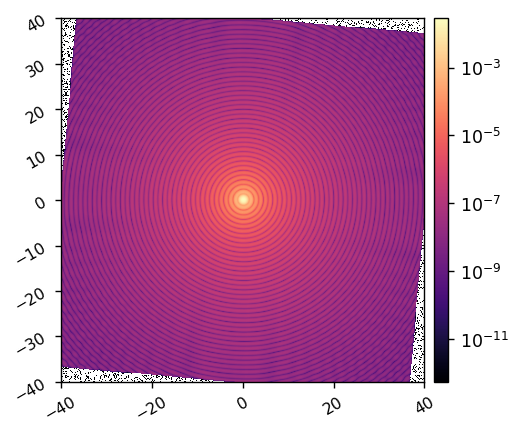

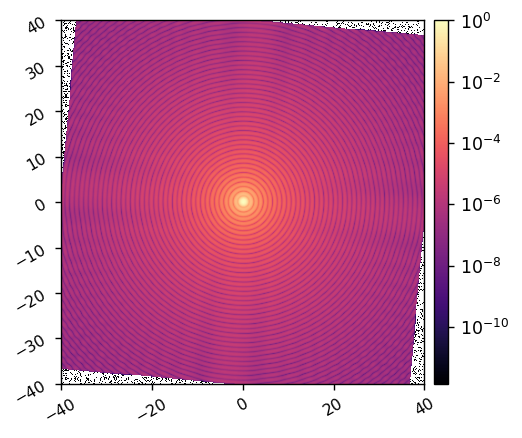

In [62]:
model = scoobm.SCOOBM()

model.det_rotation = -5

ref_im = model.snap()
misc.imshow1(ref_im, lognorm=True, pxscl=model.psf_pixelscale_lamD)

model.imnorm = ref_im.max()

normalized_im = model.snap()
misc.imshow1(normalized_im, lognorm=True, pxscl=model.psf_pixelscale_lamD)

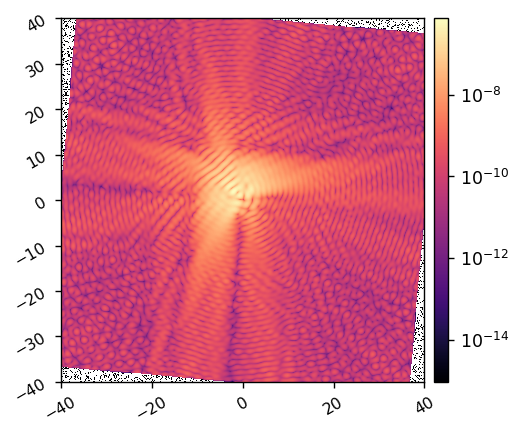

In [63]:
model.FPM = None
model.LYOT = None
model.FPM = vortex
model.LYOT = lyot_stop

im = model.snap()
misc.imshow1(im, lognorm=True, pxscl=model.psf_pixelscale_lamD)


Propagating wavelength 632.800 nm.
PSF calculated in 0.156s


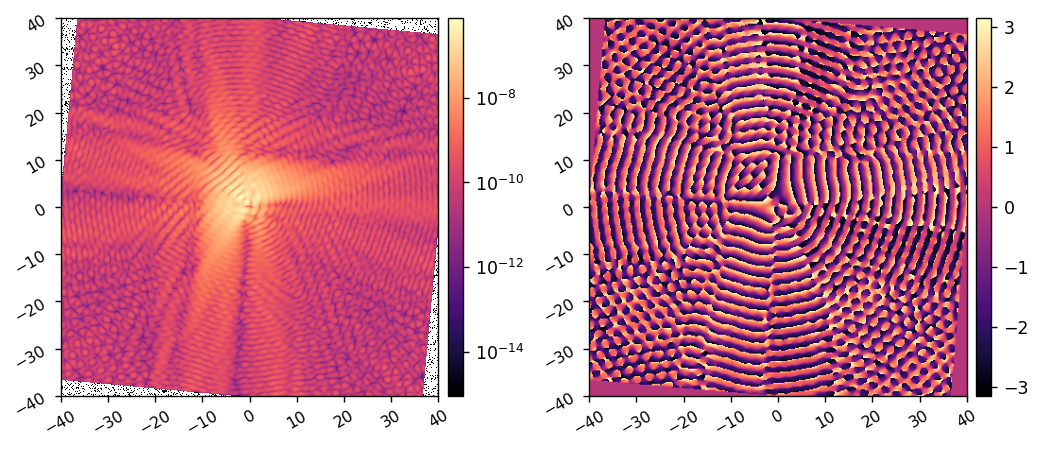

In [64]:
wfs = model.calc_wfs()

misc.imshow2(wfs[-1].intensity, wfs[-1].phase, 
             lognorm1=True, 
             pxscl=model.psf_pixelscale_lamD)

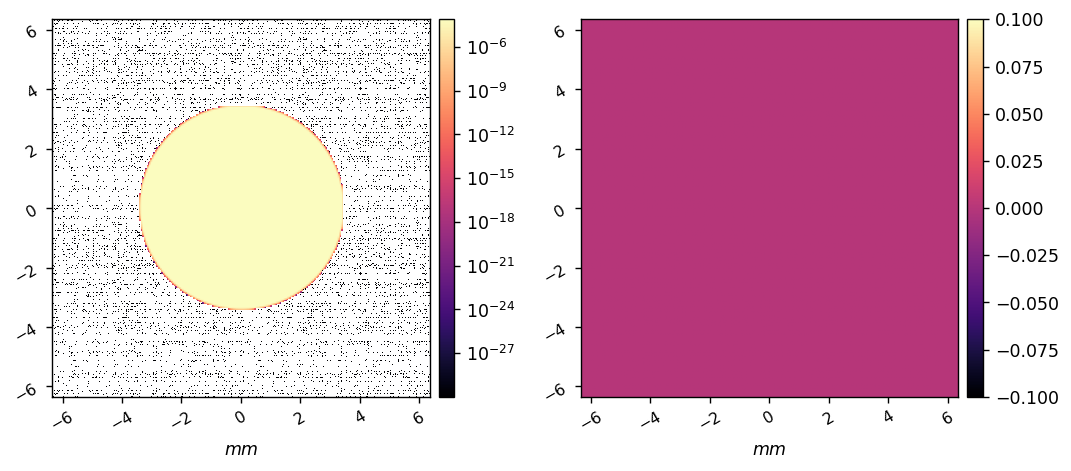

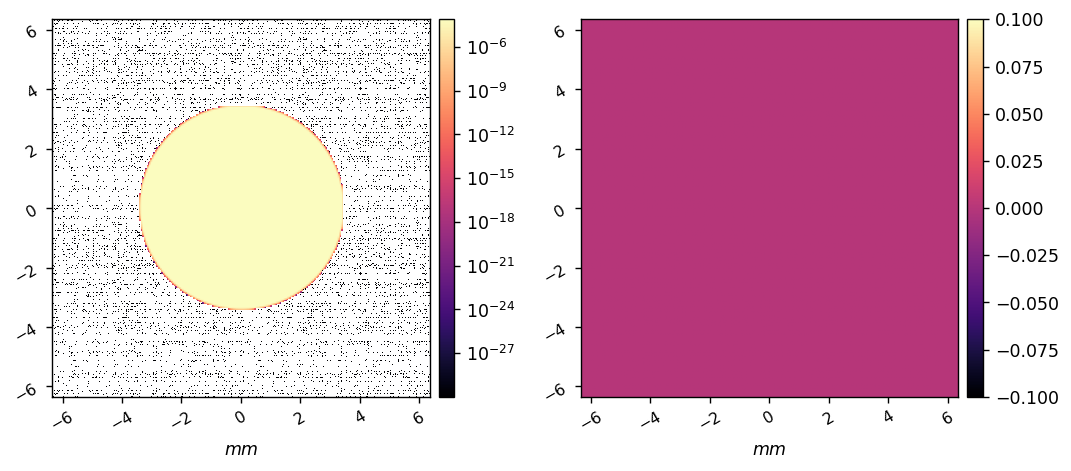

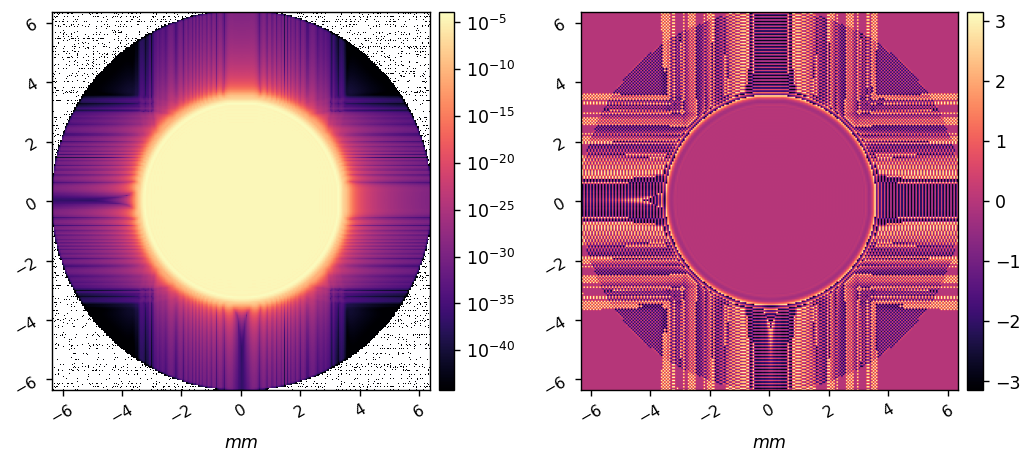

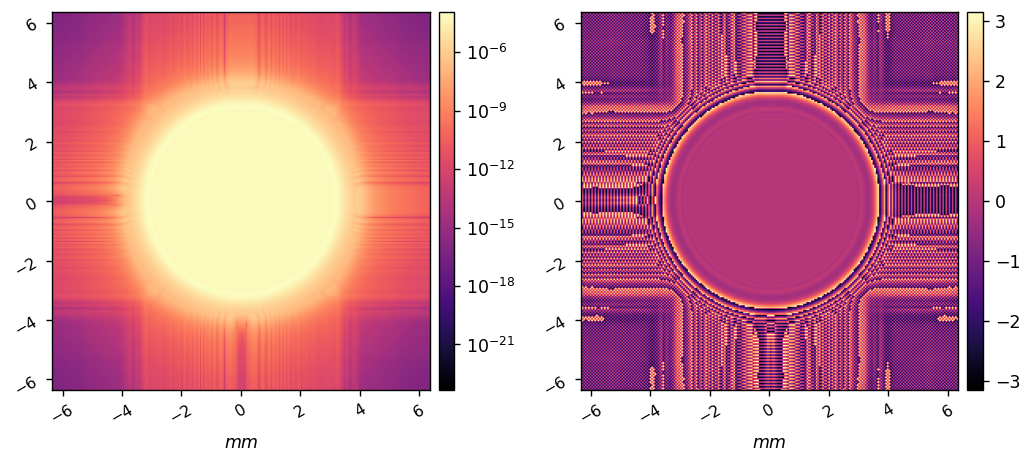

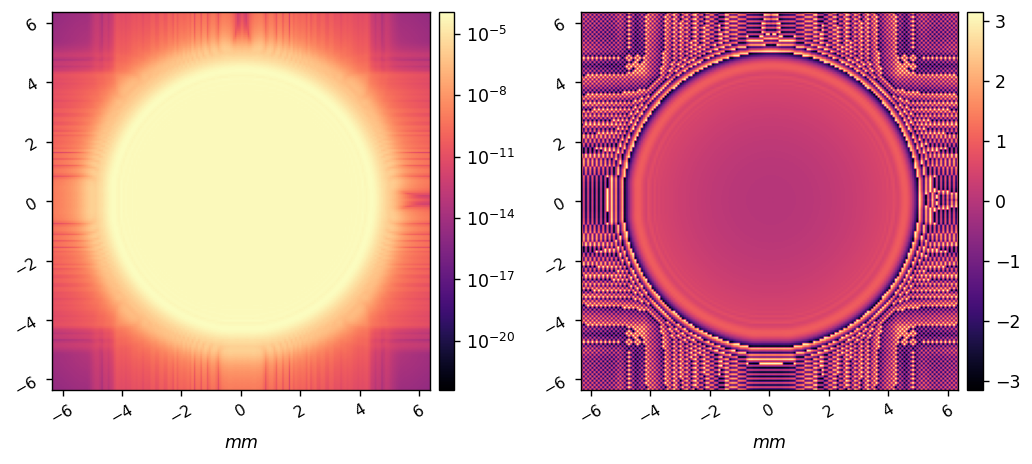

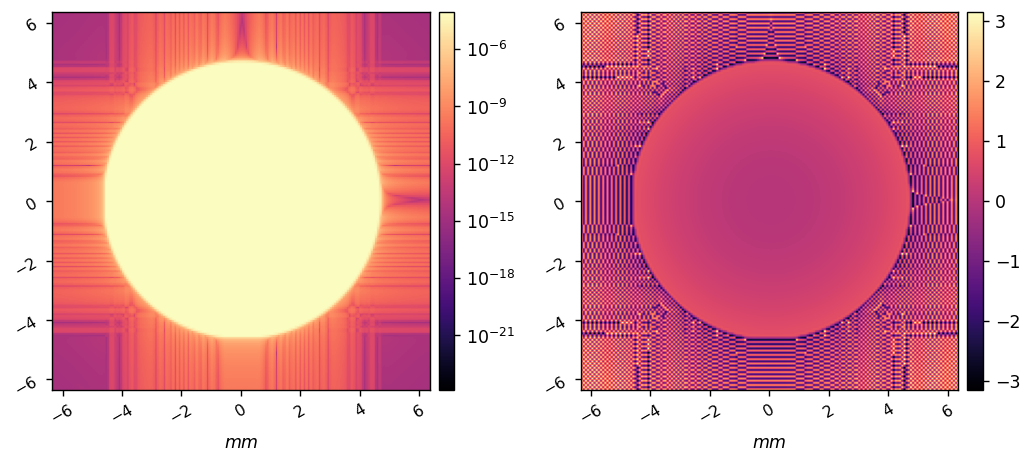

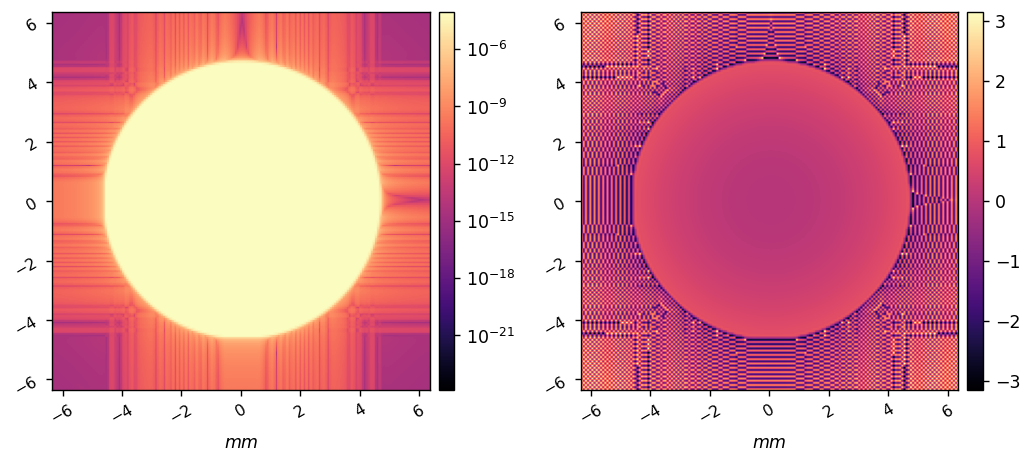

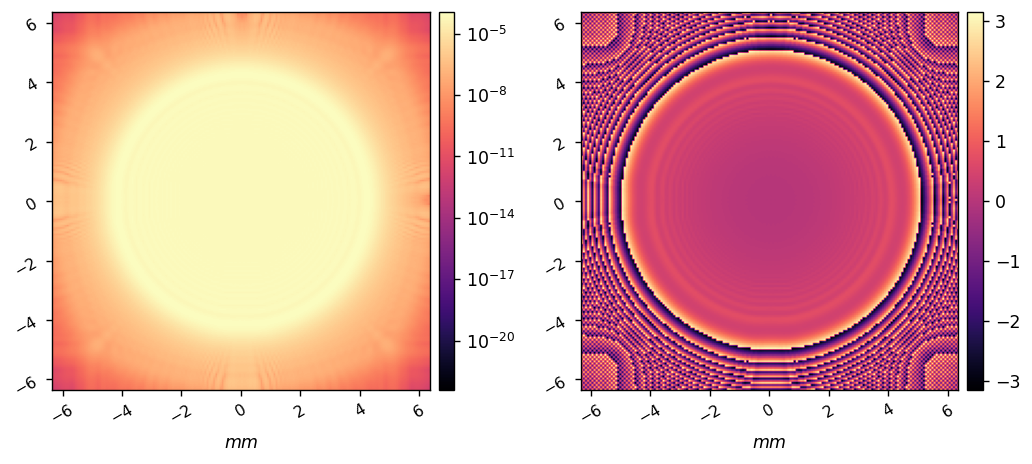

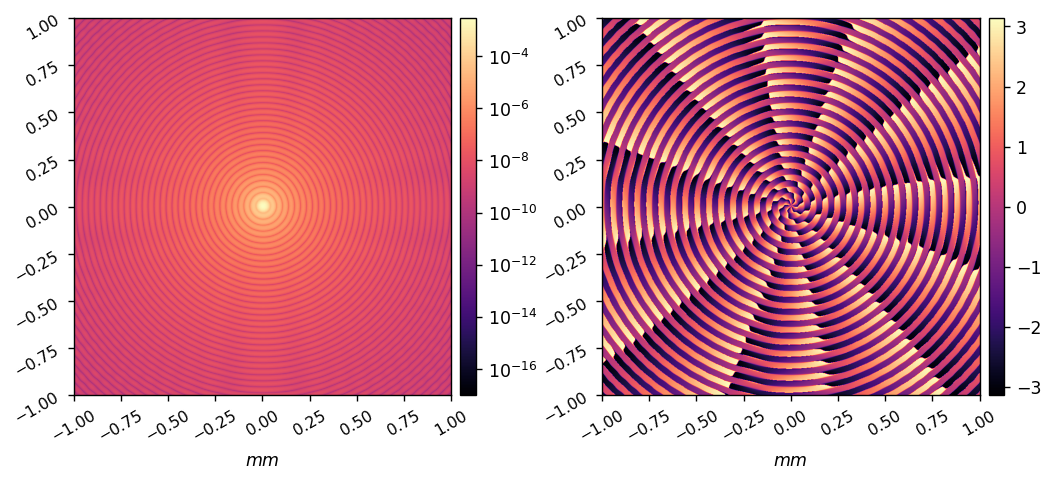

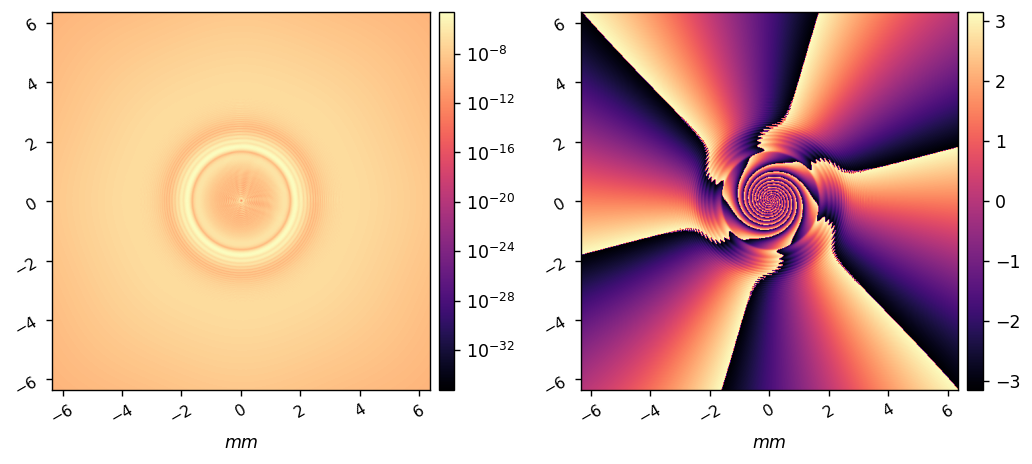

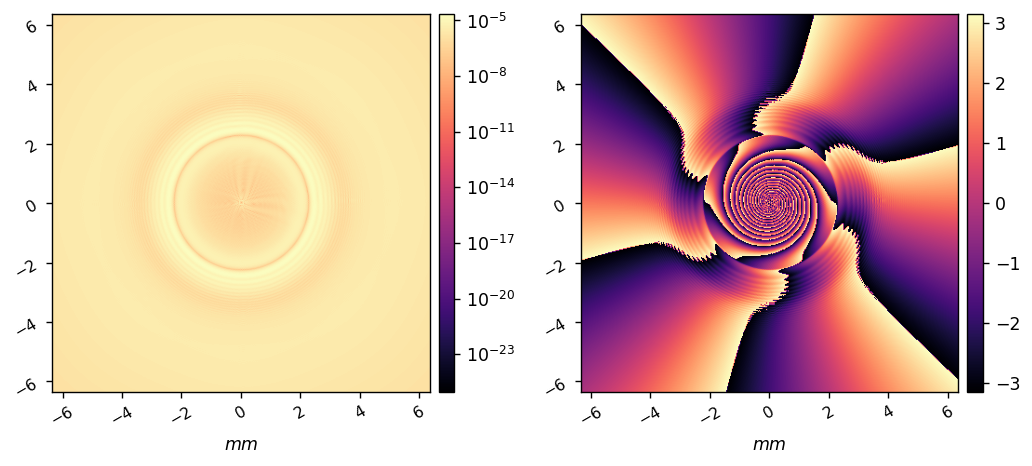

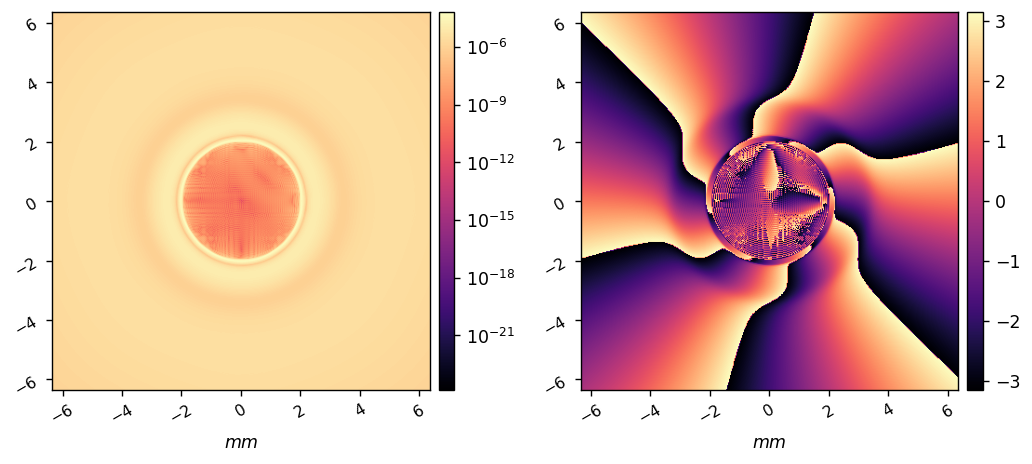

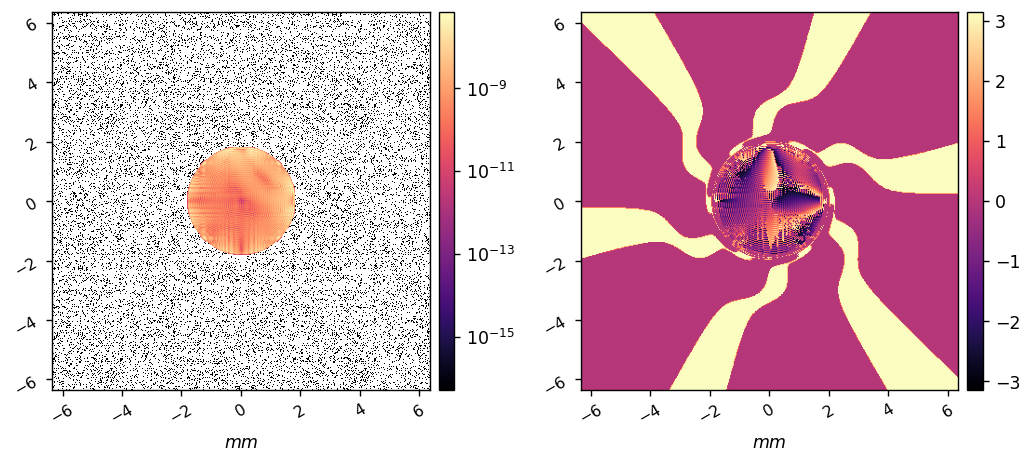

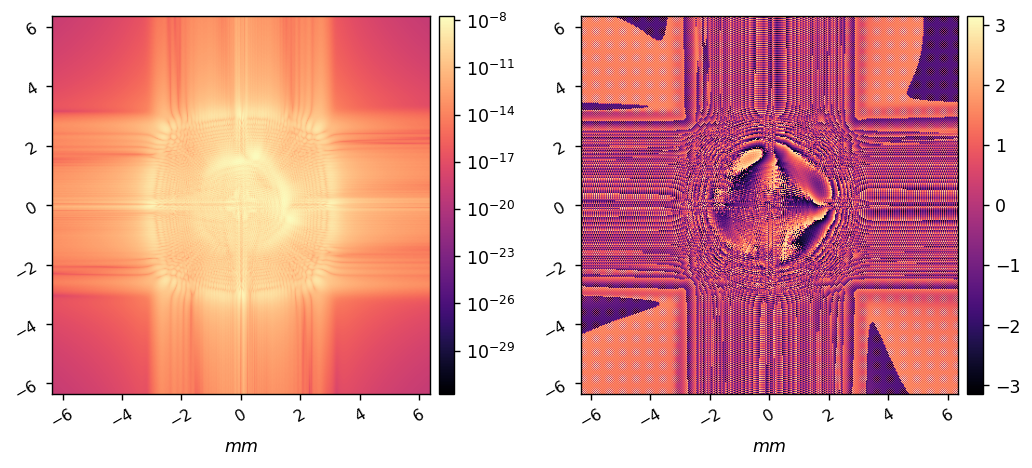

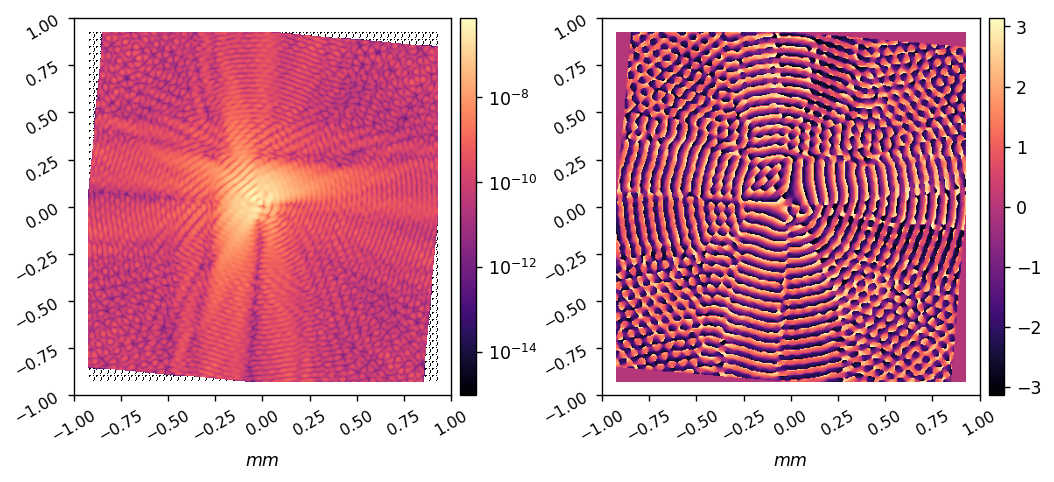

In [65]:
for i,wf in enumerate(wfs):
    if wf.pixelscale.to_value(u.mm/u.pix)*model.n/2>10:
        axlim = 12.7/2
    else:
        axlim = 1
    axlims = [-axlim, axlim, -axlim, axlim]
    misc.imshow2(wf.intensity, wf.phase, 
                 lognorm1=True, 
                 pxscl=wf.pixelscale.to_value(u.mm/u.pix), xlabel='$mm$',
                 axlims=axlims)